# **Applied Machine Learning Homework 5**

David: David Palumbo


### Natural Language Processing
We will train a supervised model to predict if a movie has a positive or a negative review.

####  **Dataset loading & dev/test splits**

**1.0) Load the movie reviews dataset from NLTK library**

In [45]:
import nltk
nltk.download("movie_reviews")
from nltk.corpus import movie_reviews
import pandas as pd
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dpalumbo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpalumbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpalumbo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

pos_document = [(' '.join(movie_reviews.words(file_id)),category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id) if category == 'pos']
neg_document = [(' '.join(movie_reviews.words(file_id)),category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id) if category == 'neg']

# List of postive and negative reviews
pos_list = [pos[0] for pos in pos_document]
neg_list = [neg[0] for neg in neg_document]

**1.1) Make a data frame that has reviews and its label**

In [47]:
# code here
import numpy as np

total_data = {"review":pos_list+neg_list, "label":[1]*len(pos_list) + [0]*len(neg_list)}
ds = pd.DataFrame(total_data)

print(ds.head())

print("Number of examples in final dataset: ", len(ds))

                                              review  label
0  films adapted from comic books have had plenty...      1
1  every now and then a movie comes along from a ...      1
2  you ' ve got mail works alot better than it de...      1
3  " jaws " is a rare film that grabs your attent...      1
4  moviemaking is a lot like being the general ma...      1
Number of examples in final dataset:  2000


**1.2 look at the class distribution of the movie reviews**

Text(0.5, 1.0, 'Distribution of Class Label')

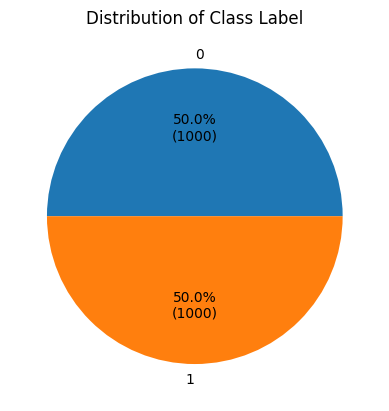

In [48]:
# code here
def pct_func(pct):
    val = int(np.around((pct * len(ds))/100))
    return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)

ax = ds.groupby("label").size().plot(kind="pie", autopct=pct_func)
ax.set_title("Distribution of Class Label")

**1.3) Create a development & test split (80/20 ratio):**

In [49]:
# code here
from sklearn.model_selection import train_test_split

dev_text, test_text, dev_y, test_y = train_test_split(ds["review"], ds["label"], test_size=0.2, random_state=42)

print("dev_y:")
print(dev_y.value_counts())
print("test_y:")
print(test_y.value_counts())

dev_y:
1    801
0    799
Name: label, dtype: int64
test_y:
0    201
1    199
Name: label, dtype: int64


#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You may use `re` package for this. 

**1.4) Replace the `#` symbol with '' in every review**

In [50]:
# code here
for index, row in dev_text.items():
    row = re.sub("#", "", row)

for index, row in test_text.items():
    row = re.sub("#", "", row)


**1.5) Replace hyperlinks with '' in every review**

In [51]:
# code here
for index, row in dev_text.items():
    row = re.sub(r'https?:\/\/\S+', '', row)

for index, row in test_text.items():
    row = re.sub(r'https?:\/\/\S+', '', row)


**1.6) Remove all stop words**

In [52]:
# code here
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
for index, row in dev_text.items():
    for word in ENGLISH_STOP_WORDS:
        row = re.sub(word, '', row)

for index, row in test_text.items():
    for word in ENGLISH_STOP_WORDS:
        row = re.sub(word, '', row)

**1.7) Remove all punctuations**

In [53]:
# code here
for index, row in dev_text.items():
    row = re.sub(r'[^\w\s]', '', row)

for index, row in test_text.items():
    row = re.sub(r'[^\w\s]', '', row)


**1.8) Apply stemming on the development & test datasets using Porter algorithm**

In [54]:
#code here
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

for index, row in dev_text.items():
    row_words = word_tokenize(row)
    for i, word in enumerate(row_words):
        row_words[i] = ps.stem(word)
    row = row_words

for index, row in test_text.items():
    row_words = word_tokenize(row)
    for i, word in enumerate(row_words):
        row_words[i] = ps.stem(word)
    row = row_words

#### **Model training**

**1.9) Create bag of words features for each review in the development dataset**

In [55]:
#code here
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(ds["review"])
dev_text_bag = vectorizer.transform(dev_text).toarray()
test_text_bag = vectorizer.transform(test_text).toarray()

print("dev shape: ", dev_text_bag.shape)
print("test shape: ", test_text_bag.shape)

dev shape:  (1600, 39659)
test shape:  (400, 39659)


**1.10) Train a Logistic Regression model on the development dataset**

In [56]:
#code here
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(max_iter=5000)
lr_model.fit(dev_text_bag, dev_y)
lr_score = lr_model.score(test_text_bag, test_y)

print("Test Score: {:.3f}".format(lr_score))

Test Score: 0.812


**1.11) Create TF-IDF features for each review in the development dataset**

In [57]:
#code here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_t = TfidfVectorizer()
vectorizer_t.fit(ds["review"])
dev_X = vectorizer_t.transform(dev_text)
test_X = vectorizer_t.transform(test_text)

print("dev shape: ", dev_X.shape)
print("test shape: ", test_X.shape)

dev shape:  (1600, 39659)
test shape:  (400, 39659)


**1.12) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [58]:
#code here
from sklearn.linear_model import LogisticRegressionCV

lr_model_t = LogisticRegressionCV(max_iter=5000)
lr_model_t.fit(dev_X, dev_y)
lr_score_t = lr_model_t.score(test_X, test_y)

print("Test Score: {:.3f}".format(lr_score_t))

Test Score: 0.823


**1.13) Compare the performance of the two models on the test dataset. Explain the difference in results obtained?**

In [59]:
#code here
print("Test Score Original:\t {:.3f}".format(lr_score))
print("Test Score TF-IDF:\t {:.3f}".format(lr_score_t))

Test Score Original:	 0.812
Test Score TF-IDF:	 0.823


In [60]:
""" 
Both accuracies are very similar.  Presuamably many of the 'uesless words' were taking out with the manual filtering.
Though the TF-IDF model is slightly better due to the extra level of filtering, presumably.
"""

" \nBoth accuracies are very similar.  Presuamably many of the 'uesless words' were taking out with the manual filtering.\nThough the TF-IDF model is slightly better due to the extra evel of filtering, presumably.\n"